In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
##################################     R E T 3 A T R      S T R A T E G Y       ###########################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [2]:
# CLEAR VAR
from clearall import clearall
clearall()

In [3]:
# LIBRAIRIES
import pandas as pd
import numpy as np
import time
import talib
import hmmlearn
import datetime as dt


In [4]:
%%time

x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

df = pd.read_csv('Base_Clean/'+x.replace('/','')+_period+'.csv')
df = df.drop(['HigMax','LowMin','Total'],axis=1)

CPU times: user 1.66 s, sys: 182 ms, total: 1.85 s
Wall time: 1.85 s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751406 entries, 0 to 751405
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      751406 non-null  object 
 1   OpenBid   751406 non-null  float64
 2   HighBid   751406 non-null  float64
 3   LowBid    751406 non-null  float64
 4   CloseBid  751406 non-null  float64
 5   OpenAsk   751406 non-null  float64
 6   HighAsk   751406 non-null  float64
 7   LowAsk    751406 non-null  float64
 8   CloseAsk  751406 non-null  float64
 9   Open      751406 non-null  float64
 10  High      751406 non-null  float64
 11  Low       751406 non-null  float64
 12  Close     751406 non-null  float64
dtypes: float64(12), object(1)
memory usage: 74.5+ MB


In [6]:
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965


In [7]:
# VANILLA TEST ON RETURN

In [8]:
%%time
df['Return3Neg'] = (df['CloseAsk'] - df['CloseBid'].shift(3))/df['CloseBid'].shift(3)
df['Return3Pos'] = (df['CloseBid'] - df['CloseAsk'].shift(3))/df['CloseAsk'].shift(3)
df['Return3'] = np.where(df['Return3Pos']>0,1,np.where(df['Return3Neg'],-1,0))
df['ATR'] = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=5)
df['Signal'] = np.where(df['Return3']>0,1,-1)
df.head()

CPU times: user 51.4 ms, sys: 6.59 ms, total: 58 ms
Wall time: 56.6 ms


,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return3Neg,Return3Pos,Return3,ATR,Signal
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110,NaN,NaN,-1,NaN,-1
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015,NaN,NaN,-1,NaN,-1
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985,NaN,NaN,-1,NaN,-1
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930,0.000000,-0.000279,0,NaN,-1
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965,0.000124,-0.000202,-1,NaN,-1


In [9]:
df[df['Return3'] == 1].shape[0],df[df['Return3'] == -1].shape[0],df[df['Return3'] == 0].shape[0],df.shape[0],df[(df['Return3'] == -1)&(df['Return3'] == 1)].shape[0],df.shape[0],df[(df['Return3'] == 0)&(df['Return3'] == 0)].shape[0]

(247211, 497789, 6406, 751406, 0, 751406, 6406)

In [10]:
len(df[df.Signal == -1]),len(df[df.Signal == 1]),len(df[df.Signal == -1])-len(df[df.Signal == 1])

(504195, 247211, 256984)

In [11]:
df = df.dropna()
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return3Neg,Return3Pos,Return3,ATR,Signal
5,2010-09-06 17:25:00,1.28784,1.28787,1.28745,1.28761,1.28809,1.28809,1.28763,1.28784,1.287965,1.287980,1.287540,1.287725,-0.000062,-0.000342,-1,0.000300,-1
6,2010-09-06 17:30:00,1.28761,1.28781,1.28730,1.28752,1.28784,1.28799,1.28753,1.28775,1.287725,1.287900,1.287415,1.287635,-0.000070,-0.000388,-1,0.000337,-1
7,2010-09-06 17:35:00,1.28752,1.28752,1.28732,1.28738,1.28775,1.28775,1.28750,1.28759,1.287635,1.287635,1.287410,1.287485,-0.000194,-0.000551,-1,0.000315,-1
8,2010-09-06 17:40:00,1.28738,1.28744,1.28729,1.28735,1.28759,1.28764,1.28749,1.28757,1.287485,1.287540,1.287390,1.287460,-0.000031,-0.000380,-1,0.000282,-1
9,2010-09-06 17:45:00,1.28735,1.28736,1.28735,1.28736,1.28757,1.28760,1.28754,1.28760,1.287460,1.287480,1.287445,1.287480,0.000062,-0.000303,-1,0.000232,-1


Début des opérations horodatée à 2020-11-16 17:44:57.353078
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399325, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279528
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420782
   macro avg       1.00      1.00      1.00    420782
weighted avg       1.00      1.00      1.00    420782

[[279528      0]
 [     0 141254]]


 Joblib Model  JOBLIB/svm/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


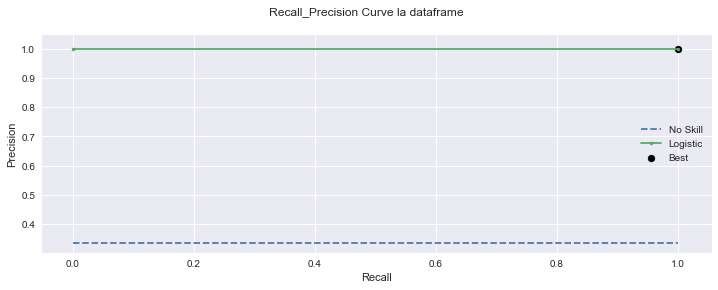



 ===> MODELISATION terminée.
Temps d'excution du module 0:00:03.091120


In [45]:
from svm import modelize

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [12]:
df.Signal = df.Signal.shift(-1)
df = df.dropna()

Début des opérations horodatée à 2020-11-16 17:45:00.785341
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399325, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 75.25 %
Achat - Precision : 63.14 %
Achat - Recall : 63.1 %
Achat - F-measure: : 63.12 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81    279528
         1.0       0.63      0.63      0.63    141254

    accuracy                           0.75    420782
   macro avg       0.72      0.72      0.72    420782
weighted avg       0.75      0.75      0.75    420782

[[227487  52041]
 [ 52119  89135]]


 Joblib Model  JOBLIB/svm/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.631


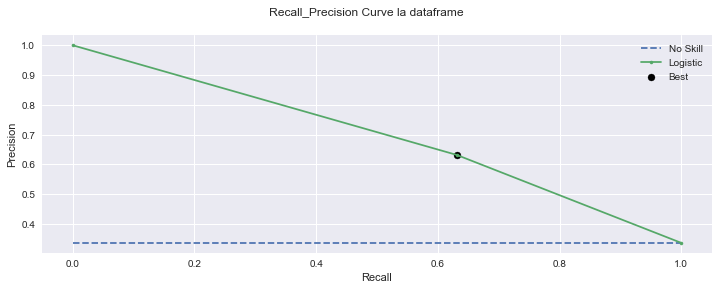



 ===> MODELISATION terminée.
Temps d'excution du module 0:18:55.186898


In [47]:
from svm import modelize
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [13]:
%%time
import joblib
df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/svm/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

CPU times: user 3min 55s, sys: 3.61 s, total: 3min 58s
Wall time: 4min 5s


In [14]:
SIGNALS

array([-1., -1., -1., ...,  1., -1., -1.])

In [15]:
len(df.iloc[-int(len(df) * 0.2):,:].Signal.shift(-1).dropna()),len(SIGNALS)

(150279, 150280)

In [16]:
resultat = pd.DataFrame()

In [17]:
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']

In [18]:
resultat

,SIGNALS,Controle,Result
0,-1.0,-1.0,0.0
1,-1.0,-1.0,0.0
2,-1.0,-1.0,0.0
3,-1.0,-1.0,0.0
4,-1.0,-1.0,0.0
...,...,...,...
150275,1.0,1.0,0.0
150276,1.0,1.0,0.0
150277,1.0,-1.0,2.0
150278,-1.0,-1.0,0.0


In [19]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
import colorama as col



accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,'Achat pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

 Achat pour  EUR/USD 

Achat - Accuracy : 77.05 %
Achat - Precision : 62.03 %
Achat - Recall : 62.03 %



              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84    104860
         1.0       0.62      0.62      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87613 17247]
 [17247 28173]]


CPU times: user 601 ms, sys: 11.4 ms, total: 613 ms
Wall time: 613 ms


In [20]:
###########
## BT VANILLA => TIME EXIT AND/OR REVERSAL SIGNAL
#######

In [34]:
%%time
print('Importing Librairies...')
from sklearn.linear_model import LinearRegression
import colorama as col
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import time
import os
import datetime as dt
import numpy as np
import fxcmpy
import socketio
import shelve
import talib
import statistics
import pyttsx3

#from numpy import loadtxt
#from functools import reduce
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80
_year_bottom = '2018-04-07 22:45:00'
_year_top = '2020-05-07 00:55:00'

_verbose = 0

engine = pyttsx3.init()

print('Librairies imported\n')
print('version fxcmpy :',fxcmpy.__version__)
%matplotlib inline
plt.style.use('seaborn')
engine.say("librairie loaded")
engine.runAndWait()

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])

x = 'EUR/USD'

print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return3','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return3'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

_target = 0.0015
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:
        
        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 5:
        if i - _index_entry >= 1:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 5 :
        if i - _index_entry >= 1:   
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))


Importing Librairies...
Début des opérations horodatée à 2020-11-17 00:13:46.646014
Librairies imported

version fxcmpy : 1.2.6
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -15039.5 !. En  2324   transactions.
 
Nbre de winners : 1031 
 
Nbre de loosers : 1292 
Temps d'excution du BT 0:00:15.951251
CPU times: user 6.78 s, sys: 152 ms, total: 6.93 s
Wall time: 16 s


In [35]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-04-07 22:45:00  à 2020-05-07 00:55:00 
 Total Number of trades 2324 
Started Cash : 50000
P&L in currency:  -15039.5$ 
P&L in %:  -7.52% 
Average trade duration 48
# Winners  1031
# Loosers  1292
Cumulated gains 66810.5
Cumulated losses -81850.0
 PROFIT FACTOR :  0.82 
 Winners Ratio : 44.38 % 
Average Winners 28.75
Average Loosers -35.22
Average pnl -6.47
% Average Winners 0.01
% Average Loosers -0.02
% Average pnl -0.01
Number of opened trades 2324
Number of closed trades 2323


In [36]:
###########
## BT COMPARE => TIME EXIT AND/OR REVERSAL SIGNAL +  RE-ENTERING ON SIGNAL
#######

In [37]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return3','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return3'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry >= 1:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i]) #High
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry < 1:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry >= 1:   
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell # Low
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i]) # Low
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry < 1:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-17 00:18:23.790581
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -152997.5 !. En  21860   transactions.
 
Nbre de winners : 5246 
 
Nbre de loosers : 16614 
Temps d'excution du BT 0:00:21.020781
CPU times: user 14.8 s, sys: 149 ms, total: 15 s
Wall time: 21 s


In [38]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-04-07 22:45:00  à 2020-05-07 00:55:00 
 Total Number of trades 21860 
Started Cash : 50000
P&L in currency:  -152997.5$ 
P&L in %:  -76.5% 
Average trade duration 1
# Winners  5246
# Loosers  16614
Cumulated gains 54258.5
Cumulated losses -207256.0
 PROFIT FACTOR :  0.26 
 Winners Ratio : 24.0 % 
Average Winners 2.48
Average Loosers -9.48
Average pnl -7.0
% Average Winners 0.0
% Average Loosers -0.0
% Average pnl -0.11
Number of opened trades 21860
Number of closed trades 21860


In [39]:
_target = 0.0015

In [40]:
#######
## BT COMPARE + TARGET
########

In [41]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return3','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return3'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry >= 1:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        ### RE_ENGAGE ON VALID SIGNAL
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry < 1:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)
        
        # CLOSE LONG ON TARGET
        if (float(price.Low_Bid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry >= 1:   
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        ### RE-ENGAGE ON VALID SIGNAL
        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry < 1:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        ### CLOSE SHORT ON TARGET
        if (float(price.High_Ask.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0
        
        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-17 00:18:45.156566
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -152997.5 !. En  21860   transactions.
 
Nbre de winners : 5246 
 
Nbre de loosers : 16614 
Temps d'excution du BT 0:00:21.339994
CPU times: user 15.2 s, sys: 143 ms, total: 15.3 s
Wall time: 21.3 s


In [42]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-04-07 22:45:00  à 2020-05-07 00:55:00 
 Total Number of trades 21860 
Started Cash : 50000
P&L in currency:  -152997.5$ 
P&L in %:  -76.5% 
Average trade duration 1
# Winners  5246
# Loosers  16614
Cumulated gains 54258.5
Cumulated losses -207256.0
 PROFIT FACTOR :  0.26 
 Winners Ratio : 24.0 % 
Average Winners 2.48
Average Loosers -9.48
Average pnl -7.0
% Average Winners 0.0
% Average Loosers -0.0
% Average pnl -0.11
Number of opened trades 21860
Number of closed trades 21860


In [43]:
########
### BT COMPARE LONG EXIT + TARGET

In [44]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return3','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return3'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG ON LONG TIME EXIT
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry >= 48:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        ### RE_ENGAGE ON VALID SIGNAL
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry < 48:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)
        
        # CLOSE LONG ON TARGET
        if (float(price.Low_Bid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target:
            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.Close_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT ON LONG TIME EXIT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry >= 48:   
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        ### RE-ENGAGE ON VALID SIGNAL
        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry < 48:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        ### CLOSE SHORT ON TARGET
        if (float(price.High_Ask.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Close_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0
        
        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-17 00:19:06.875697
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  3329452.5 !. En  44142   transactions.
 
Nbre de winners : 38488 
 
Nbre de loosers : 5492 
Temps d'excution du BT 0:00:28.313751
CPU times: user 21.9 s, sys: 263 ms, total: 22.1 s
Wall time: 28.3 s


In [45]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-04-07 22:45:00  à 2020-05-07 00:55:00 
 Total Number of trades 43980 
Started Cash : 50000
P&L  in currency:  3329452.5$ 
P&L in %:  1664.73% 
Average trade duration 20.19
# Winners  38488
# Loosers  5492
Cumulated gains 4148761.0
Cumulated losses -819308.5
 PROFIT FACTOR :  5.06 
 Winners Ratio : 87.51 % 
Average Winners 336.42
Average Loosers -66.44
Average pnl 269.98
% Average Winners 0.17
% Average Loosers -0.03
% Average pnl 4.52
Number of opened trades 12332
Number of closed trades 43980
